In [4]:
## Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels as sm
import statsmodels.formula.api as smf

In [53]:
## Importing data
path = 'experiments_data_Dec5.csv'
df = pd.read_csv(path)

In [54]:
df.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
0,24,26,female,United States,5,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,...,4,4,4,3,2,0,3,2,2,2
1,25,25,male,United States,5,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,5,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,...,0,2,0,3,0,1,0,4,0,1
3,27,32,male,Kenya,4,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,4,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,...,5,0,3,0,1,0,4,0,2,0


# EDA

In [55]:
df.describe()

,respondent_id,age,education,level,number_check,time_spent_in_treatment_or_control,pre_positive_affect,pre_negative_affect,post_positive_affect,post_negative_affect,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
count,216.000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,...,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000,216.000000
mean,131.500,29.518519,4.324074,5.814815,1.523148,-506.799683,18.837963,11.791667,18.458333,11.356481,...,2.083333,2.004630,1.990741,2.129630,1.115741,1.074074,1.763889,1.819444,1.222222,1.171296
std,62.498,11.359644,0.903005,1.870944,2.885315,11847.484556,17.120004,11.448901,15.523070,10.266122,...,1.998255,1.782336,1.904684,1.802286,1.276089,1.118169,1.777061,1.619587,1.359434,1.217435
min,24.000,-26.000000,1.000000,2.000000,0.000000,-171805.884524,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,77.750,25.000000,4.000000,5.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,131.500,28.000000,4.000000,7.000000,0.000000,0.000000,24.000000,12.000000,21.000000,10.000000,...,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,1.500000,2.000000,1.000000,1.000000
75%,185.250,30.000000,5.000000,7.000000,0.000000,170.969470,33.000000,21.000000,31.000000,18.000000,...,4.000000,4.000000,4.000000,4.000000,2.000000,2.000000,3.000000,3.000000,2.000000,2.000000
max,239.000,99.000000,6.000000,7.000000,7.000000,24735.092758,50.000000,42.000000,50.000000,41.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000


Text(0.5, 1.0, 'Participant Age Distribution')

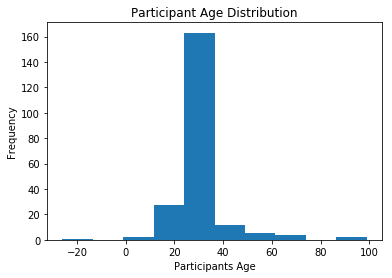

In [56]:
# plotting distribution of age
df.age.hist(grid=False)
plt.xlabel('Participants Age')
plt.ylabel('Frequency')
plt.title('Participant Age Distribution')

Text(0.5, 1.0, 'Participant Group Distribution')

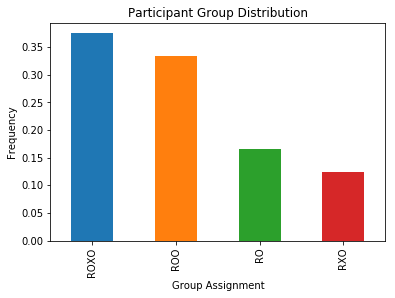

In [57]:
# plotting distribution of groups
ratio_of_groups = df['group'].value_counts()/sum(df['group'].value_counts())
ratio_of_groups.plot(kind='bar')
plt.xlabel('Group Assignment')
plt.ylabel('Frequency')
plt.title('Participant Group Distribution')

In [58]:
df.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
0,24,26,female,United States,5,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,...,4,4,4,3,2,0,3,2,2,2
1,25,25,male,United States,5,RO,2018-11-17 01:22:27.974986+00:00,2018-11-17 01:23:18.119645+00:00,6,0,...,0,0,0,0,0,0,0,0,0,0
2,26,25,female,United States,5,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,...,0,2,0,3,0,1,0,4,0,1
3,27,32,male,Kenya,4,ROXO,2018-11-17 01:46:18.703943+00:00,2018-11-17 01:46:18.917251+00:00,2,0,...,0,0,0,0,0,0,0,0,0,0
4,28,28,female,United States,4,ROXO,2018-11-17 01:47:34.454053+00:00,2018-11-17 01:53:51.607042+00:00,6,0,...,5,0,3,0,1,0,4,0,2,0


In [59]:
## Looking into Attrition

In [60]:
df_ROXO = df[(df.group.isin(['ROXO']))]

In [61]:
df_ROXO.groupby('gender').count()

,respondent_id,age,location,education,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
gender,,,,,,,,,,,,,,,,,,,,,
female,33,33,33,33,33,33,33,33,33,33,...,33,33,33,33,33,33,33,33,33,33
male,48,48,48,48,48,48,48,48,48,48,...,48,48,48,48,48,48,48,48,48,48


In [62]:
df_ROXO_v1 = df[((df.group.isin(['ROXO'])) & (df.level == 7))]

In [63]:
df_ROXO_v1.groupby('gender').count()

,respondent_id,age,location,education,group,enrolled,last_update,level,number_check,time_spent_in_treatment_or_control,...,pre_determined,post_determined,pre_attentive,post_attentive,pre_jittery,post_jittery,pre_active,post_active,pre_afraid,post_afraid
gender,,,,,,,,,,,,,,,,,,,,,
female,16,16,16,16,16,16,16,16,16,16,...,16,16,16,16,16,16,16,16,16,16
male,30,30,30,30,30,30,30,30,30,30,...,30,30,30,30,30,30,30,30,30,30


# Data Cleaning

In [64]:
## Remove age 99, 1

In [65]:
df = df[df.age != 99]
df = df[df.age != 1]

In [66]:
## Change -26 age value to 26. The person completed the survey might be a mistake in entry.

In [67]:
df['age'] = np.where(df['age']== -26, 26, df['age'])

Notes:
* 1. Remove people assigned to treatment but did not get the correct number check and who do not get to level 7
* 2. Remove people in the control group who did not get to level 7

### 1

In [68]:
df_ROXO = df[((df.group.isin(['ROXO'])) & (df.level == 7))]

In [69]:
df_RXO = df[((df.group.isin(['RXO'])) &  (df.level == 7))]

### 2.

In [70]:
df_ROO =  df[((df.group.isin(['ROO'])) & (df.level == 7) ) ]

In [71]:
df_RO = df[((df.group.isin(['RO'])) & (df.level == 7) ) ]

In [72]:
## Calculating Treatment effect, y

In [73]:
df_ROXO['y_positive'] = df_ROXO['post_positive_affect'] -  df_ROXO['pre_positive_affect']
df_RXO['y_positive'] = df_RXO['post_positive_affect'] -  df_RXO['pre_positive_affect']
df_ROO['y_positive'] = df_ROO['post_positive_affect'] -  df_ROO['pre_positive_affect']
df_RO['y_positive'] = df_RO['post_positive_affect'] -  df_RO['pre_positive_affect']

df_ROXO['y_negative'] = df_ROXO['post_negative_affect'] -  df_ROXO['pre_negative_affect']
df_RXO['y_negative'] = df_RXO['post_negative_affect'] -  df_RXO['pre_negative_affect']
df_ROO['y_negative'] = df_ROO['post_negative_affect'] -  df_ROO['pre_negative_affect']
df_RO['y_negative'] = df_RO['post_negative_affect'] -  df_RO['pre_negative_affect']


df_ROXO['y_net'] = df_ROXO['y_positive'] -  df_ROXO['y_negative']
df_RXO['y_net'] = df_RXO['y_positive'] -  df_RXO['y_negative']
df_ROO['y_net'] = df_ROO['y_positive'] -  df_ROO['y_negative']
df_RO['y_net'] = df_RO['y_positive'] -  df_RO['y_negative']


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [74]:
## Recombining all the dataframes
df_clean = pd.concat([df_RO, df_ROO, df_ROXO, df_RXO])

# Analysis

In [75]:
df_clean.groupby('group')['y_net'].mean()

group
RO      13.043478
ROO      2.771930
ROXO    -4.413043
RXO      1.250000
Name: y_net, dtype: float64

In [76]:
## Attempting to normalize the distributions to have a better t test analysis

(array([4., 2., 3., 2., 1., 2., 0., 4., 3., 2.]),
 array([-2. ,  1.2,  4.4,  7.6, 10.8, 14. , 17.2, 20.4, 23.6, 26.8, 30. ]),
 <a list of 10 Patch objects>)

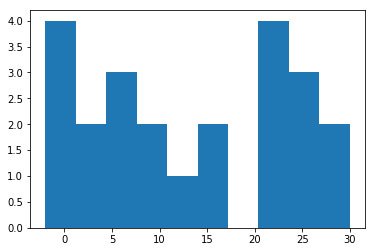

In [77]:
plt.hist(df_RO.y_net)

(array([21.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  1.]),
 array([1.35335283e-01, 1.06864746e+12, 2.13729492e+12, 3.20594237e+12,
        4.27458983e+12, 5.34323729e+12, 6.41188475e+12, 7.48053221e+12,
        8.54917967e+12, 9.61782712e+12, 1.06864746e+13]),
 <a list of 10 Patch objects>)

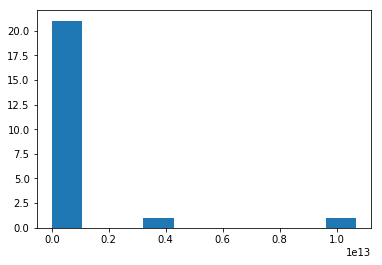

In [78]:
ro_normal = df_RO.y_net.apply(lambda x: np.exp(x))
ro_normal.replace([np.inf, -np.inf], np.nan, inplace=True)
ro_normal.dropna(inplace=True)

plt.hist(ro_normal)

In [79]:
## T Test to look into the different groups and determine if we can collapse them

In [80]:
## Control groups

In [81]:
## We reject the Ho, means are not equal
import scipy
scipy.stats.ttest_ind(df_RO.post_positive_affect, df_ROO.post_positive_affect, equal_var=False)

Ttest_indResult(statistic=-0.5455336409750448, pvalue=0.5889985200914156)

In [82]:
scipy.stats.ttest_ind(df_RO.post_negative_affect, df_ROO.post_negative_affect, equal_var=False)

Ttest_indResult(statistic=-0.2406628328487015, pvalue=0.8106365737048619)

In [83]:
## Treatment groups

In [84]:
## We cannot reject the Ho, so we can assume the means are equal
scipy.stats.ttest_ind(df_ROXO.post_positive_affect, df_RXO.post_positive_affect, equal_var=False)

Ttest_indResult(statistic=0.7942903552190325, pvalue=0.433938438092911)

In [85]:
scipy.stats.ttest_ind(df_ROXO.post_negative_affect, df_RXO.post_negative_affect, equal_var=False)

Ttest_indResult(statistic=-1.9445042646773587, pvalue=0.06507728109941102)

In [86]:
a = smf.ols('y_net ~   group ', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.0435,2.279,5.724,0.000,8.577,17.509
group[T.ROO],-10.2715,2.445,-4.200,0.000,-15.065,-5.479
group[T.ROXO],-17.4565,2.601,-6.712,0.000,-22.554,-12.359
group[T.RXO],-11.7935,4.710,-2.504,0.012,-21.025,-2.562


In [87]:
a = smf.ols('y_net ~ group + C(location) + group*C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,9.8304,20.135,0.488,0.625,-29.634,49.295
group[T.ROO],-3.2304,20.368,-0.159,0.874,-43.150,36.690
group[T.ROXO],-8.3304,20.290,-0.411,0.681,-48.098,31.437
group[T.RXO],-8.8304,60.045,-0.147,0.883,-126.517,108.856
C(location)[T.Kenya],7.4196,20.216,0.367,0.714,-32.204,47.043
C(location)[T.United States],-1.3758,20.208,-0.068,0.946,-40.983,38.232
group[T.ROO]:C(location)[T.Kenya],-10.4482,20.504,-0.510,0.610,-50.635,29.739
group[T.ROXO]:C(location)[T.Kenya],-14.1196,20.511,-0.688,0.491,-54.320,26.081
group[T.RXO]:C(location)[T.Kenya],11.5804,61.271,0.189,0.850,-108.508,131.669
group[T.ROO]:C(location)[T.United States],-3.6113,20.461,-0.176,0.860,-43.714,36.492


In [88]:
## Since we are assuming all the means are equal when running t test for only the post survey, we will collapse the post positive and negative
## responses and look at the treatment effect

In [89]:
df_ROXO['y_post'] = df_ROXO['post_positive_affect'] - df_ROXO['post_negative_affect']
df_RXO['y_post'] = df_RXO['post_positive_affect'] - df_RXO['post_negative_affect']
df_treatment = pd.concat([df_ROXO, df_RXO])
df_treatment['assign'] = 't'


df_ROO['y_post'] = df_ROO['post_positive_affect'] - df_ROO['post_negative_affect']
df_RO['y_post'] = df_RO['post_positive_affect'] - df_RO['post_negative_affect']
df_control = pd.concat([df_ROO, df_RO])
df_control['assign'] = 'c'

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try 

In [90]:
## combine treatment and control df to one df
df_clean = pd.concat([df_treatment, df_control])

In [91]:
a = smf.ols('y_post ~   assign ', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.8250,1.301,10.623,0.000,11.274,16.376
assign[T.t],-6.9218,2.153,-3.215,0.001,-11.141,-2.702


In [92]:
a = smf.ols('y_post ~   assign + C(gender)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.8802,1.522,9.119,0.000,10.897,16.863
assign[T.t],-6.9037,2.218,-3.112,0.002,-11.251,-2.556
C(gender)[T.male],-0.1262,2.160,-0.058,0.953,-4.360,4.108


In [93]:
a = smf.ols('y_post ~ assign + C(gender) + C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,13.4226,4.913,2.732,0.006,3.794,23.051
assign[T.t],-6.0043,2.134,-2.813,0.005,-10.188,-1.821
C(gender)[T.male],0.8774,2.134,0.411,0.681,-3.305,5.060
C(location)[T.Kenya],4.5706,5.410,0.845,0.398,-6.034,15.175
C(location)[T.United States],-3.5558,5.392,-0.659,0.510,-14.124,7.012


In [94]:
a = smf.ols('y_post ~   assign + C(location) + assign*C(location)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,10.8000,4.159,2.597,0.009,2.648,18.952
assign[T.t],1.8667,15.475,0.121,0.904,-28.463,32.197
C(location)[T.Kenya],8.2303,4.693,1.754,0.079,-0.967,17.427
C(location)[T.United States],-0.7048,4.432,-0.159,0.874,-9.391,7.981
assign[T.t]:C(location)[T.Kenya],-9.7859,15.904,-0.615,0.538,-40.957,21.385
assign[T.t]:C(location)[T.United States],-7.3278,15.688,-0.467,0.640,-38.076,23.421


In [95]:
a = smf.ols('y_post ~   assign + C(gender) + assign*C(gender)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,15.4667,1.599,9.675,0.000,12.334,18.600
assign[T.t],-11.2359,3.135,-3.584,0.000,-17.381,-5.091
C(gender)[T.male],-3.7524,2.679,-1.400,0.161,-9.004,1.499
assign[T.t]:C(gender)[T.male],8.3549,4.406,1.896,0.058,-0.281,16.991


In [96]:
df_clean['age_bin'] = pd.cut(df_clean.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])

In [97]:
a = smf.ols('y_post ~   assign + C(gender) + C(location) + C(age_bin)', data= df_clean).fit(cov_type='HC3')
a.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,17.4027,6.479,2.686,0.007,4.703,30.102
assign[T.t],-5.2936,2.179,-2.430,0.015,-9.564,-1.023
C(gender)[T.male],0.2973,2.115,0.141,0.888,-3.848,4.442
C(location)[T.Kenya],4.5352,5.410,0.838,0.402,-6.068,15.138
C(location)[T.United States],-3.6735,5.460,-0.673,0.501,-14.375,7.028
C(age_bin)[T.20-35],-4.0290,4.101,-0.982,0.326,-12.067,4.008
C(age_bin)[T.35-50],-3.4136,5.584,-0.611,0.541,-14.357,7.530
C(age_bin)[T.50-100],-26.4356,32.323,-0.818,0.413,-89.787,36.916


# For group level positive and negative models

##  *ROXO Models*

In [98]:
df_ROXO_model = df_ROXO.copy()
df_ROXO_model['age_bin'] = pd.cut(df_ROXO_model.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])
df_ROXO_model.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,post_jittery,pre_active,post_active,pre_afraid,post_afraid,y_positive,y_negative,y_net,y_post,age_bin
7,31,27,male,United States,4,ROXO,2018-11-17 03:46:12.767672+00:00,2018-11-17 03:57:52.832488+00:00,7,0,...,1,3,3,2,2,-1,6,-7,9,20-35
11,35,23,female,United States,1,ROXO,2018-11-17 04:27:14.830550+00:00,2018-11-17 05:14:52.274705+00:00,7,7,...,2,3,3,4,2,3,-5,8,14,20-35
12,36,32,male,Kenya,5,ROXO,2018-11-17 05:17:43.359763+00:00,2018-11-17 05:23:46.987133+00:00,7,0,...,1,2,2,3,2,-7,-4,-3,11,20-35
18,42,30,female,United States,5,ROXO,2018-11-17 19:56:59.460475+00:00,2018-11-17 20:02:16.054874+00:00,7,7,...,1,1,3,5,4,3,-4,7,-5,20-35
30,54,25,male,United States,4,ROXO,2018-11-17 22:31:26.931533+00:00,2018-11-17 22:41:17.518932+00:00,7,7,...,2,3,4,3,1,4,-4,8,22,20-35


In [99]:
df_ROXO_model.groupby('location').group.count()

location
India             2
Kenya            15
United States    29
Name: group, dtype: int64

###  1. ROXO Positive Model

In [100]:
ROXO_positive = smf.ols('y_positive ~  C(gender) + C(education) + C(location)', data= df_ROXO_model).fit(cov_type='HC3')
ROXO_positive.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.4928,16.404,0.030,0.976,-31.658,32.644
C(gender)[T.male],1.4325,2.937,0.488,0.626,-4.325,7.190
C(education)[T.2],-7.4325,13.971,-0.532,0.595,-34.815,19.950
C(education)[T.4],-5.7891,13.759,-0.421,0.674,-32.755,21.177
C(education)[T.5],-8.6291,13.514,-0.639,0.523,-35.116,17.858
C(location)[T.Kenya],-4.1121,9.876,-0.416,0.677,-23.470,15.245
C(location)[T.United States],2.5072,9.556,0.262,0.793,-16.222,21.236


### 2. ROXO Negative Model

In [102]:
ROXO_negative = smf.ols('y_negative ~  C(gender) + C(education) + C(location)', data= df_ROXO_model).fit(cov_type='HC3')
ROXO_negative.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-12.9083,6.956,-1.856,0.064,-26.543,0.726
C(gender)[T.male],3.7635,2.221,1.695,0.090,-0.589,8.116
C(education)[T.2],-2.7635,5.296,-0.522,0.602,-13.143,7.616
C(education)[T.4],3.7005,4.691,0.789,0.430,-5.493,12.894
C(education)[T.5],3.3525,4.508,0.744,0.457,-5.482,12.187
C(location)[T.Kenya],2.6147,5.953,0.439,0.661,-9.054,14.283
C(location)[T.United States],7.9083,5.691,1.390,0.165,-3.247,19.063


##  *RXO Models*

In [103]:
df_RXO_model = df_RXO.copy()
df_RXO_model['age_bin'] = pd.cut(df_RXO_model.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])
df_RXO_model.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,post_jittery,pre_active,post_active,pre_afraid,post_afraid,y_positive,y_negative,y_net,y_post,age_bin
35,59,33,male,United States,5,RXO,2018-11-18 00:29:27.591362+00:00,2018-11-18 00:38:22.889304+00:00,7,7,...,1,0,2,0,2,18,16,2,2,20-35
46,70,25,male,India,5,RXO,2018-11-18 05:36:21.552642+00:00,2018-11-18 05:44:35.690096+00:00,7,7,...,1,0,1,0,1,18,17,1,1,20-35
58,82,30,female,United States,4,RXO,2018-11-18 20:09:05.773931+00:00,2018-11-18 20:17:03.981312+00:00,7,0,...,2,0,3,0,5,16,37,-21,-21,20-35
62,86,49,male,United States,4,RXO,2018-11-19 00:44:20.156778+00:00,2018-11-19 00:52:44.443654+00:00,7,7,...,2,0,2,0,1,21,14,7,7,35-50
64,88,26,female,United States,5,RXO,2018-11-19 04:47:25.035857+00:00,2018-11-19 04:57:17.166517+00:00,7,7,...,2,0,2,0,1,25,12,13,13,20-35


In [106]:
df_RXO_model.groupby('location').group.count()

location
India             1
Kenya             3
United States    12
Name: group, dtype: int64

###  1. RXO Positive Model

In [107]:
RXO_positive = smf.ols('y_positive ~  C(gender) + C(education) + C(location)', data= df_RXO_model).fit(cov_type='HC3')
RXO_positive.summary().tables[1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,23.2692,68.820,0.338,0.735,-111.616,158.155
C(gender)[T.male],-3.6154,4.355,-0.830,0.406,-12.150,4.920
C(education)[T.4],-1.5000,66.397,-0.023,0.982,-131.635,128.635
C(education)[T.5],-1.6538,66.634,-0.025,0.980,-132.254,128.946
C(location)[T.Kenya],15.7308,25.303,0.622,0.534,-33.863,65.324
C(location)[T.United States],1.7692,16.480,0.107,0.915,-30.532,34.070


### 2. RXO Negative Model

In [108]:
RXO_negative = smf.ols('y_negative ~  C(gender) + C(education) + C(location)', data= df_RXO_model).fit(cov_type='HC3')
RXO_negative.summary().tables[1]

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/scipy/stats/stats.py:1394: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=16
  "anyway, n=%i" % int(n))


,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,38.3846,53.618,0.716,0.474,-66.705,143.474
C(gender)[T.male],-12.3077,6.277,-1.961,0.050,-24.611,-0.004
C(education)[T.4],-6.0000,48.744,-0.123,0.902,-101.537,89.537
C(education)[T.5],-9.0769,49.161,-0.185,0.854,-105.430,87.277
C(location)[T.Kenya],-16.3846,23.894,-0.686,0.493,-63.215,30.446
C(location)[T.United States],0.3846,21.821,0.018,0.986,-42.384,43.153


##  *ROO Models*

In [109]:
df_ROO_model = df_ROO.copy()
df_ROO_model['age_bin'] = pd.cut(df_ROO_model.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])
df_ROO_model.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,post_jittery,pre_active,post_active,pre_afraid,post_afraid,y_positive,y_negative,y_net,y_post,age_bin
0,24,26,female,United States,5,ROO,2018-11-17 01:18:38.708246+00:00,2018-11-17 01:21:51.608501+00:00,7,0,...,0,3,2,2,2,0,-9,9,8,20-35
5,29,30,female,United States,4,ROO,2018-11-17 01:57:46.015614+00:00,2018-11-17 02:00:18.067241+00:00,7,0,...,4,5,5,1,2,2,1,1,22,20-35
9,33,23,male,Kenya,1,ROO,2018-11-17 04:03:40.900200+00:00,2018-11-17 04:20:50.586140+00:00,7,0,...,1,1,3,2,2,-1,-7,6,12,20-35
13,37,29,female,Kenya,5,ROO,2018-11-17 05:46:49.416065+00:00,2018-11-17 05:53:38.528661+00:00,7,0,...,1,2,3,1,1,-1,-2,1,19,20-35
14,38,33,female,United States,5,ROO,2018-11-17 07:31:07.329831+00:00,2018-11-17 07:35:31.127330+00:00,7,0,...,1,4,4,2,2,0,-1,1,27,20-35


In [110]:
df_ROO_model.groupby('location').group.count()

location
India             5
Kenya            21
United States    31
Name: group, dtype: int64

###  1. ROO Positive Model

In [ ]:
ROO_positive = smf.ols('y_positive ~  C(gender) + C(education) + C(location)', data= df_ROO_model).fit(cov_type='HC3')
ROO_positive.summary().tables[1]

### 2. ROO Negative Model

In [ ]:
ROO_negative = smf.ols('y_negative ~  C(gender) + C(education) + C(location)', data= df_ROO_model).fit(cov_type='HC3')
ROO_negative.summary().tables[1]

## *RO Models*

In [113]:
df_RO_model = df_RO.copy()
df_RO_model['age_bin'] = pd.cut(df_RO_model.age, [0, 20, 35, 50, 100], labels=['0-20', '20-35', '35-50', '50-100'])
df_RO_model.head()

,respondent_id,age,gender,location,education,group,enrolled,last_update,level,number_check,...,post_jittery,pre_active,post_active,pre_afraid,post_afraid,y_positive,y_negative,y_net,y_post,age_bin
2,26,25,female,United States,5,RO,2018-11-17 01:32:38.782377+00:00,2018-11-17 01:36:05.459238+00:00,7,0,...,1,0,4,0,1,24,11,13,13,20-35
6,30,36,male,Kenya,4,RO,2018-11-17 03:07:01.091136+00:00,2018-11-17 03:13:46.047357+00:00,7,0,...,2,0,3,0,3,24,26,-2,-2,35-50
21,45,42,male,United States,5,RO,2018-11-17 20:22:39.466785+00:00,2018-11-17 20:25:09.052666+00:00,7,0,...,1,0,1,0,1,18,10,8,8,35-50
29,53,29,male,United States,5,RO,2018-11-17 22:22:02.013427+00:00,2018-11-17 22:25:35.802046+00:00,7,0,...,1,0,1,0,1,13,11,2,2,20-35
61,85,31,female,United States,5,RO,2018-11-19 00:20:32.605893+00:00,2018-11-19 00:21:38.399317+00:00,7,0,...,1,0,2,0,1,15,10,5,5,20-35


In [114]:
df_RO_model.groupby('location').group.count()

location
Kenya            12
United States    11
Name: group, dtype: int64

###  1. RO Positive Model

In [115]:
RO_positive = smf.ols('y_positive ~  C(gender) + C(education) + C(location)', data= df_RO_model).fit(cov_type='HC3')
RO_positive.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,38.0000,5.333,7.125,0.000,27.547,48.453
C(gender)[T.male],2.8461,4.740,0.600,0.548,-6.443,12.136
C(education)[T.2],-2.0012,21.196,-0.094,0.925,-43.546,39.543
C(education)[T.4],-4.4027,6.431,-0.685,0.494,-17.008,8.202
C(education)[T.5],-9.9569,7.957,-1.251,0.211,-25.553,5.639
C(location)[T.United States],-9.9988,5.371,-1.862,0.063,-20.526,0.528


### 2. RO Negative Model

In [116]:
RO_negative = smf.ols('y_negative ~  C(gender) + C(education) + C(location)', data= df_RO_model).fit(cov_type='HC3')
RO_negative.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,12.0000,2.667,4.500,0.000,6.773,17.227
C(gender)[T.male],0.3929,2.208,0.178,0.859,-3.934,4.720
C(education)[T.2],1.1071,4.451,0.249,0.804,-7.617,9.832
C(education)[T.4],6.0357,3.024,1.996,0.046,0.109,11.963
C(education)[T.5],-0.7500,3.581,-0.209,0.834,-7.769,6.269
C(location)[T.United States],-0.1071,2.169,-0.049,0.961,-4.358,4.144
